In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tqdm import tqdm
import time


In [10]:
x,y=make_classification(n_samples=100000,n_classes=2)
y=y.reshape(x.shape[0],1)

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2)

In [12]:
def sigmoid(z):
    return np.round(1/(1+np.exp(-z))).astype(int)

In [34]:
def cost(g_x,y):
    epsilon = 1e-8
    first=np.matmul(   -y.transpose(),  np.log(g_x+epsilon) )
    sec= np.matmul(    (1-y).transpose(), np.log((1+epsilon)-g_x)         )
    return  first-sec    /   y.shape[0]

In [161]:
weights=np.ones((x_train.shape[1],1))
cost_list=[]
def gradient_descent(x,y,weights,lr=0.01,it=10000 , up_lr=5):
    #update learning rate after every 1/5 of iterate
    up_lr=np.floor(it/up_lr)
    for i in tqdm(range(it)):

        if  not np.mod(i,up_lr):
            lr=lr/10

        z=np.matmul(x,weights)
        g_x=sigmoid(z)
        cost_list.append(cost(g_x,y).ravel())

        grad =  (np.matmul( x.transpose(),(g_x-y)) ) / y.shape[0]
        weights= weights  - lr * grad

    return weights

start = time.time()
weights=gradient_descent(x_train,y_train.reshape(y_train.shape[0],1),weights)
finish= time.time()
execution_time = finish - start
print(f"Execution time: {execution_time:.2f} seconds")

100%|██████████| 10000/10000 [00:46<00:00, 213.81it/s]

Execution time: 46.77 seconds


In [162]:
predicted=sigmoid(np.matmul(x_train,weights))
count = np.sum(predicted == y_train)
print("samples = ",predicted.shape[0])
print("correct o/p = ",count)
print("accuracy = ",(count/predicted.shape[0])*100)

samples =  70000
correct o/p =  53293
accuracy =  76.13285714285715


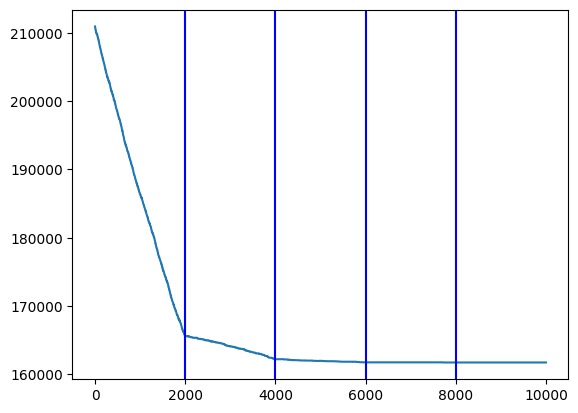

In [163]:
epochs=np.arange(0,10000).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(epochs,np.array(cost_list))

plt.axvline(x = 2000, color = 'b', label = 'axvline - full height')
plt.axvline(x = 4000, color = 'b', label = 'axvline - full height')
plt.axvline(x = 6000, color = 'b', label = 'axvline - full height')
plt.axvline(x = 8000, color = 'b', label = 'axvline - full height')

plt.show()

In [157]:
cost_list=[]
def mini_batch_gd(x,y,lr=0.001,it=10000  , batch_size=512):

    weights=np.ones((x.shape[1],1))


    for _ in tqdm(range(it)):

        indices = np.random.permutation(x.shape[0])
        # Get a random batch of indices
        batch_indices = indices[:batch_size]
        # Get the batch data and labels
        X_batch = x[batch_indices]
        y_batch = y[batch_indices]


        z=np.matmul(X_batch,weights)
        g_x=sigmoid(z)
        cost_list.append(cost(g_x,y_batch).ravel())

        grad =  (np.matmul( X_batch.transpose(),(g_x-y_batch)) ) / y_batch.shape[0]
        weights= weights  - lr * grad

    return weights

start = time.time()

weights=mini_batch_gd(x_train,y_train.reshape(y_train.shape[0],1))

finish = time.time()
execution_time = finish - start
print(f"Execution time: {execution_time:.2f} seconds")

100%|██████████| 10000/10000 [00:19<00:00, 508.37it/s]

Execution time: 19.67 seconds


In [158]:
predicted=sigmoid(np.matmul(x_train,weights))
count = np.sum(predicted == y_train)
print("samples = ",predicted.shape[0])
print("correct o/p = ",count)
print("accuracy = ",(count/predicted.shape[0])*100)

samples =  70000
correct o/p =  61308
accuracy =  87.58285714285714


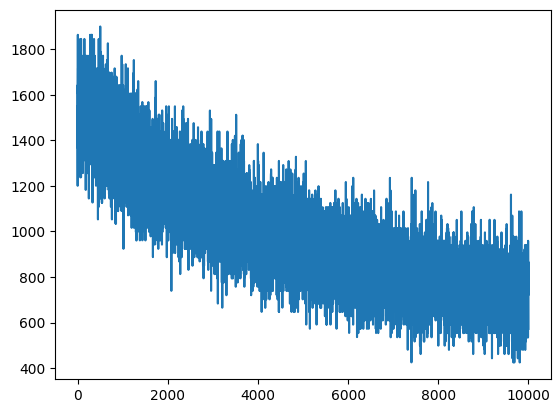

In [159]:
epochs=np.arange(0,10000).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(epochs,np.array(cost_list))
plt.show()